In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.matplotlib.style.use('default')
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
len(df)

891

In [7]:
df.shape

(891, 12)

In [9]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [11]:
df.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [14]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

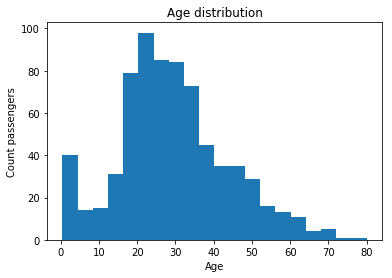

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'],bins=20, range = (df['Age'].min(),df['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count passengers');

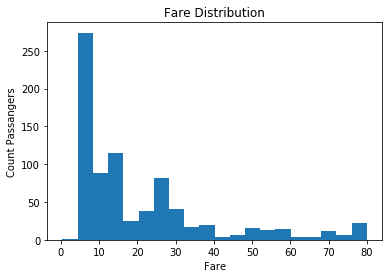

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins=20, range = (df['Age'].min(),df['Age'].max()))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count Passangers');

Text(0, 0.5, 'Count Passangers')

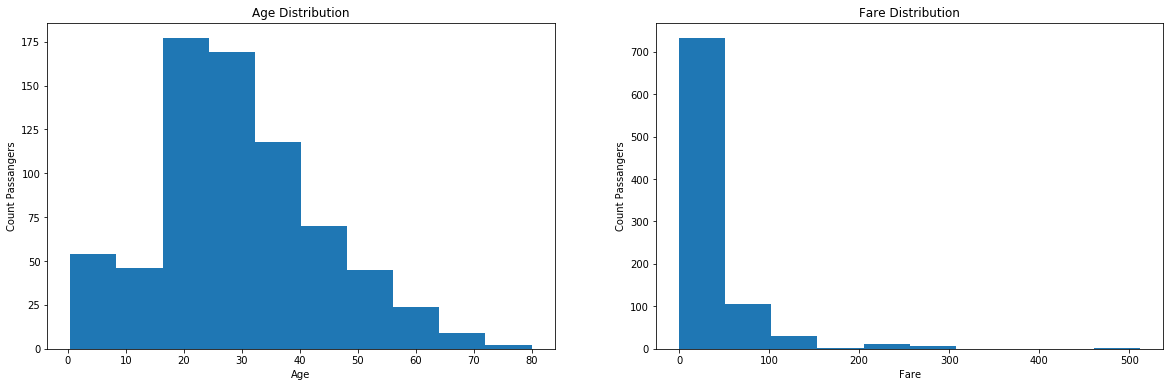

In [26]:
fig = plt.figure(figsize=(20,6))
axl = plt.subplot2grid((1,2),(0,0))
axl.hist(df['Age'], bins=10, range = (df['Age'].min(),df['Age'].max()))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count Passangers')

ax2 = plt.subplot2grid((1,2),(0,1))
ax2.hist(df['Fare'],bins=10, range = (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count Passangers')

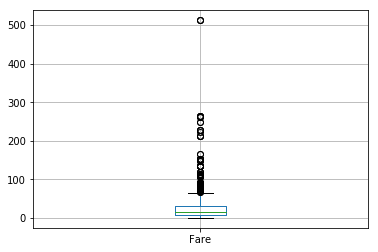

In [28]:
df.boxplot(column="Fare", return_type='dict');

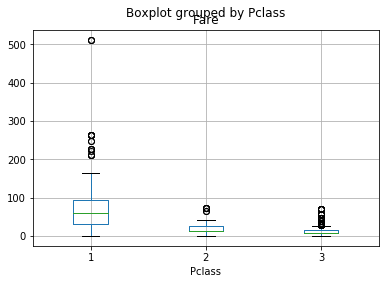

In [30]:
df.boxplot(column="Fare", by="Pclass", return_type='dict');

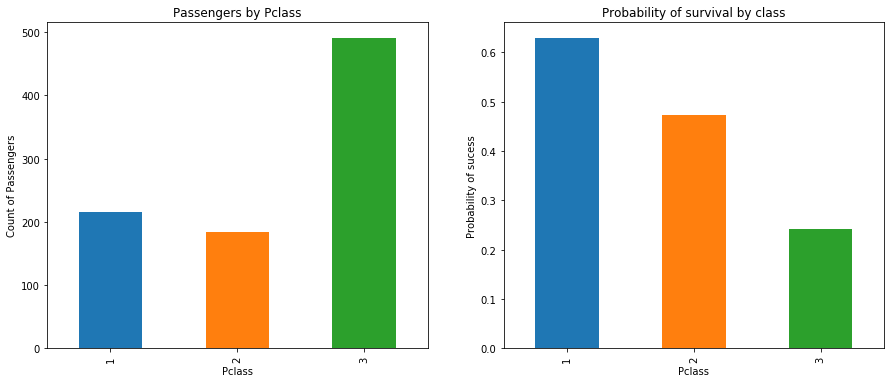

In [38]:
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of sucess')
ax2.set_title("Probability of survival by class");


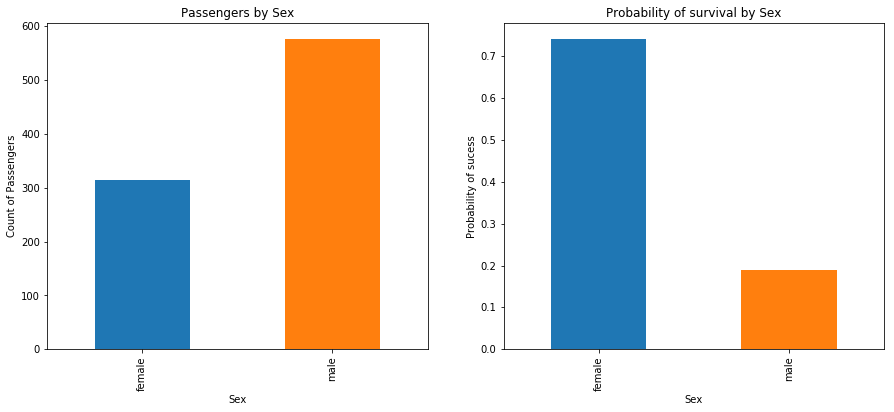

In [39]:
temp1 = df.groupby('Sex').Survived.count()
temp2 = df.groupby('Sex').Survived.sum()/df.groupby('Sex').Survived.count()

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Sex")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Probability of sucess')
ax2.set_title("Probability of survival by Sex");

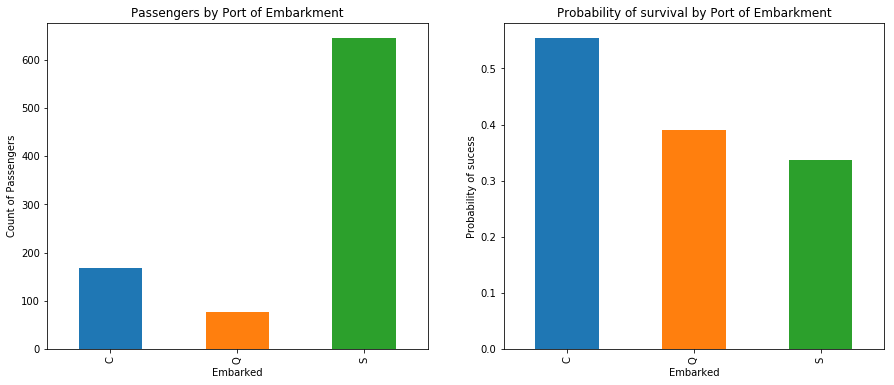

In [40]:
temp1 = df.groupby('Embarked').Survived.count()
temp2 = df.groupby('Embarked').Survived.sum()/df.groupby('Embarked').Survived.count()

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Embarked')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Port of Embarkment")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Probability of sucess')
ax2.set_title("Probability of survival by Port of Embarkment");

In [48]:
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha_scatterplot=0.2
alpha_bar_chart=0.55

ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax1.set_xlim(-1,2)
plt.title("Distribution of Survival, (1=Survived)")
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived,df.Age,alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age, (1=Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind='barh', alpha=alpha_bar_chart)
ax3.set_ylim(-1,len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")
plt.title("Age distribution within classes")

plt.legend(('1st Class','2nd Class','3rd Class'),loc='best')

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1,len(df.Embarked.value_counts()))
plt.title("Parameters per Boarding location")

plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.title("Distribution of survival")

Text(0.5, 1.0, 'Distribution of survival')